## 1. Recommender system
When you watch YouTube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What lies behind these is a type of recommender system.

# Recommender System:

- Part of unsupervised machine learning, recommender systems analyze patterns in data to make personalized recommendations to users.

# Recommender system have two types.

- 1:Content-Based Filtering
    - This method looks at what users have liked in the past and recommends similar items. It's like when you watch a movie on a streaming platform, and it suggests other films with similar themes or actors based on your preferences and the content of the movies themselves.


- 2: Colloborative Filtering
    - Instead of focusing on the characteristics of items, collaborative filtering pays attention to what similar users have liked. It's like when you see recommendations on an online store based on what other shoppers with similar tastes have purchased or liked.


# Problem in recommending system

- Cold start problem
    -  Occurs when there is limited data for new users or items, making it challenging to provide accurate recommendations. Strategies like hybrid systems are used to address this issue effectively.

# The combination of above both filtering

- Hybrid Recommender System
    - This system combines different recommendation approaches to improve accuracy. For instance, it might blend content-based and collaborative filtering methods to offer more personalized suggestions. It's like when a music app combines your listening history with the preferences of users similar to you to recommend songs, especially when you're new to the platform.



1.1 - Movielens full - EDA
Now download the dataset ml-latest.zip under the section "recommended for education and development". Read the data sets "movies.csv" and "ratings.csv" answer the following questions below.
- a) Do an EDA to understand the dataset. Include different types of plots. Do not limit yourself to the questions below, but try to examine more aspects of the data.


# EDA for Movies Data

In [2]:
import pandas as pd

# Laod the movies data
df_movies = pd.read_csv("../data/movies.csv")

# See the first 5 data of the list
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# see the last data values of list

df_movies.tail()

,movieId,title,genres
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller
86536,288983,UNZIPPED: An Autopsy of American Inequality (2...,Documentary


In [4]:
# See the different values of data like , Count , Mean , std , min and more ...

df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [5]:
# Compute the number of unique titles in the "title" column of the DataFrame
unique_title = df_movies["title"].nunique()

# Compute the number of unique movieIds in the "movieId" column of the DataFrame
unique_movies = df_movies["movieId"].nunique()

print(f"The unique values for titles = {unique_title}")
print(f"The unique values for moviesId = {unique_movies}")

The unique values for titles = 86330
The unique values for moviesId = 86537


In [6]:
# Check for missing values
missing_values = df_movies.isnull().sum()
missing_values

movieId    0
title      0
genres     0
dtype: int64

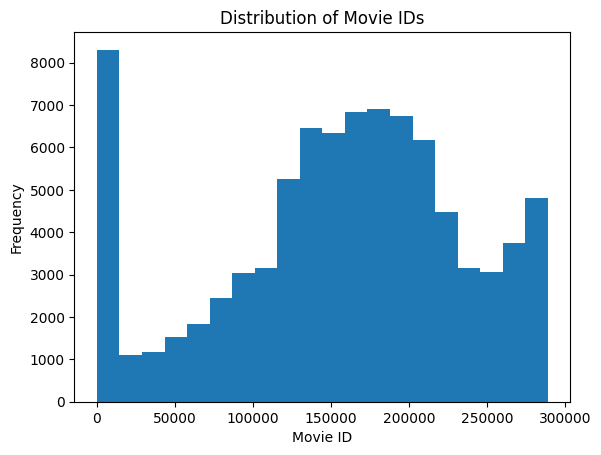

In [7]:
import matplotlib.pyplot as plt

# Histogram for movieId
plt.hist(df_movies['movieId'], bins=20)
plt.xlabel('Movie ID')
plt.ylabel('Frequency')
plt.title('Distribution of Movie IDs')
plt.show()



# EDA for Rating Data

In [8]:
# Load the Rating data for movies 
df_rating = pd.read_csv("../data/ratings.csv")

# See the top 5 values of the list
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


In [9]:
# See the last values of the list

df_rating.tail()

,userId,movieId,rating,timestamp
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765
33832161,330975,8783,2.5,1091581799


In [10]:
# check for missing values

missing_values = df_rating.isnull().sum()
missing_values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# b) What are the 10 movies with the most ratings?

In [11]:
df_rating = pd.read_csv("../data/ratings.csv")
df_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [12]:
count_movie_rating = df_rating.groupby("movieId")["rating"].count()

sort_count_list = count_movie_rating.sort_values(ascending= False)

top_10 = sort_count_list.head(10)

top_10 = top_10.reset_index() 

top_10 = top_10.rename(columns={'rating': 'rating_count'})

print(top_10)

   movieId  rating_count
0      318        122296
1      356        113581
2      296        108756
3     2571        107056
4      593        101802
5      260         97202
6     2959         86207
7      527         84232
8      480         83026
9     1196         80200


# c) Calculate the average rating for these 10 movies with the most ratings.

In [13]:
rating_count = df_rating['movieId'].value_counts()
top_10= rating_count.head(10)

top_10_movies_data = df_rating[df_rating['movieId'].isin(top_10.index)]

top_10_movies_data_average = top_10_movies_data.groupby('movieId')['rating'].mean()

top_10_movies_data_average

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

# d) Plot the years and number of movies represented in the dataset.


In [14]:
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$')

df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


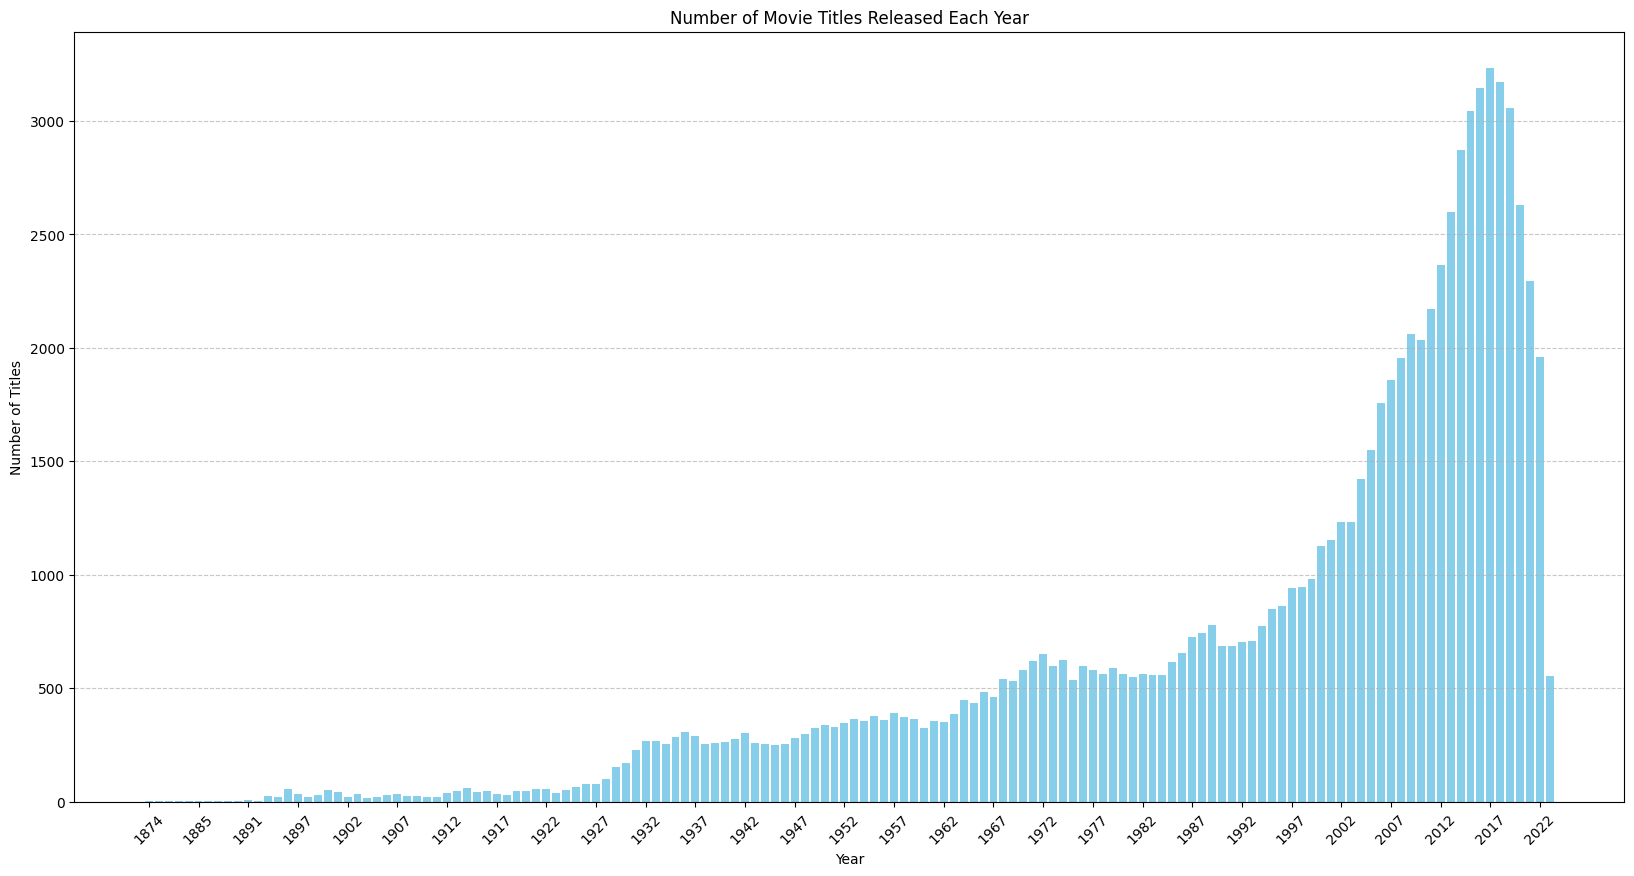

In [15]:
import matplotlib.pyplot as plt

# Group by 'year' and count the number of titles for each year
titles_per_year = df_movies.groupby('year')['title'].count()

# Plotting
plt.figure(figsize=(20, 10))
plt.bar(titles_per_year.index, titles_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.title('Number of Movie Titles Released Each Year')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(titles_per_year.index[::5], rotation=45)

plt.show()


# e) Make a plot of the number of ratings against movieId.

In [29]:
# See how many user rated each movie
rating_count = df_rating.groupby('movieId').size().reset_index(name='rating_count')

# To see the movie with total rated with respective movie title
rating_count = rating_count.merge(df_movies[['movieId', 'title']], on='movieId', how='left')

# Just to see the movie list which has more than 1000 user rated to them

rating_count = rating_count[rating_count['rating_count'] > 1500]

rating_count

,movieId,rating_count,title
0,1,76813,Toy Story (1995)
1,2,30209,Jumanji (1995)
2,3,15820,Grumpier Old Men (1995)
3,4,3028,Waiting to Exhale (1995)
4,5,15801,Father of the Bride Part II (1995)
...,...,...,...
75707,263407,2340,Don't Look Up (2021)
77018,268642,3366,The Batman (2022)
77558,270698,3947,Everything Everywhere All at Once (2022)
78400,274053,3262,Top Gun: Maverick (2022)


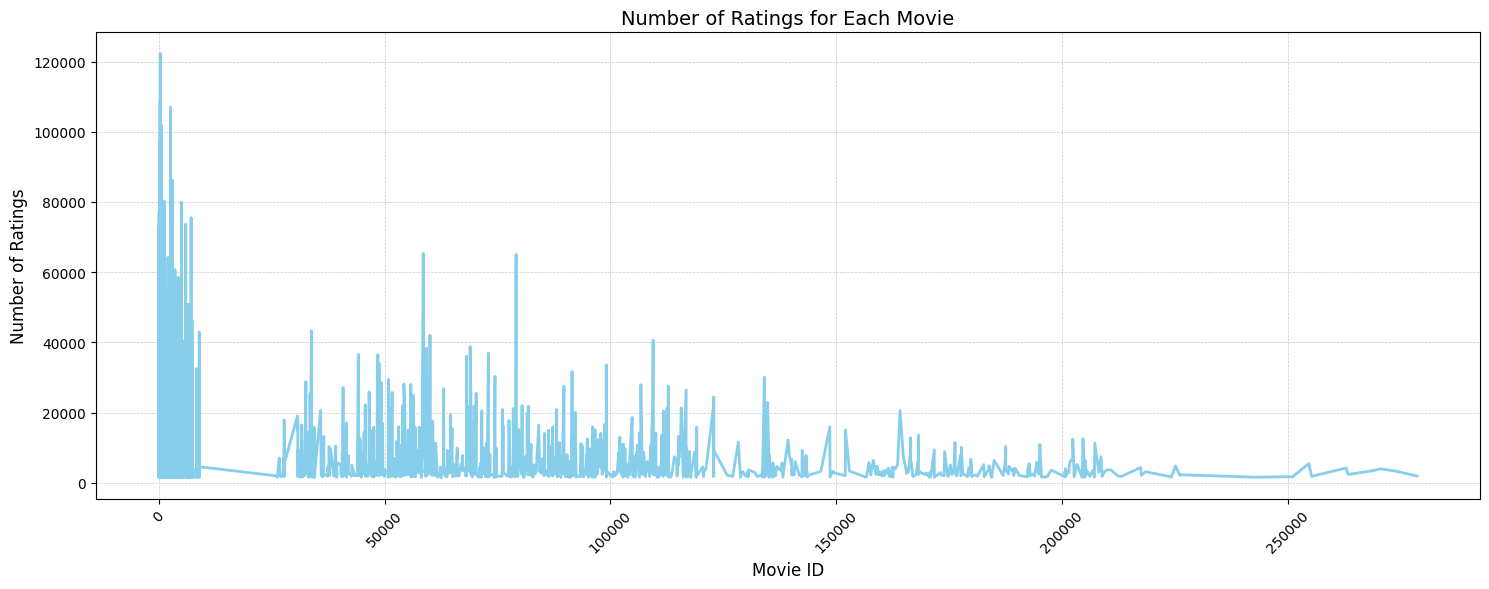

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(rating_count['movieId'], rating_count['rating_count'], color='skyblue', linewidth=2)
plt.xlabel('Movie ID', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Number of Ratings for Each Movie', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  
plt.show()


# f) Calculate average ratings for the top 10 movies with the most ratings. Make a bar graph of these.



In [ ]:
import numpy as np
top_10_movies_data_average.values

array([4.09240036, 4.19177792, 4.41679205, 4.06818922, 3.68901308,
       4.24233664, 4.15028683, 4.11802993, 4.16063088, 4.23601912])

In [38]:
x = list(map(str, top_10_movies_data_average.index.tolist()))

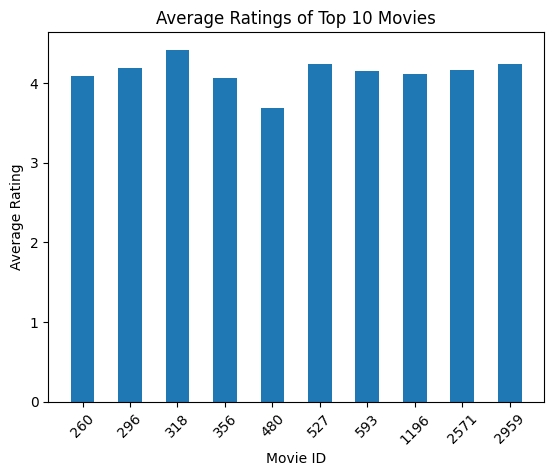

In [39]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 5))

plt.bar(x=x , height=top_10_movies_data_average.values, width=.5)  # Removed marker and linestyle parameters

plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Top 10 Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


# 1.2 Create sparse matrix

As in the video in task 1.0, you created a pivot table of the dataframe with index: "movieId", columns: "userId" and values: "ratings". However, this pivot table is "expensive" to create and your computer probably won't be able to create it unless you filter out some data. Think of a suitable way to filter your data set, try your hand at it and justify it.
Create a sparse matrix of this pivot table using scipy.sparse.csc_matrix(). If you want to use all the data, it can also be solved, but you need to solve how to create the sparse matrix without pandas pivot table.

In [58]:
import pandas as pd
import numpy as np


# Load Movies data 
movies_df = pd.read_csv("../data/movies.csv")


# Drop Genres column from the data
movies_df = movies_df.drop(columns=["genres"])

# Let me make the fist the year column
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)$')

# Convert the 'year' column to integer
movies_df['year'] = pd.to_numeric(movies_df['year'])


# By this code i want only the movie data which are releated after 1960
movies_df = movies_df[movies_df['year'] > 1960]


movies_df


,movieId,title,year
0,1,Toy Story (1995),1995.0
1,2,Jumanji (1995),1995.0
2,3,Grumpier Old Men (1995),1995.0
3,4,Waiting to Exhale (1995),1995.0
4,5,Father of the Bride Part II (1995),1995.0
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),2021.0
86533,288971,Ouija Japan (2021),2021.0
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),1973.0
86535,288977,Skinford: Death Sentence (2023),2023.0


In [59]:
# Load Rating data 
rating_df = pd.read_csv("../data/ratings.csv")

# Drop timestamp column from data
rating_df = rating_df.drop(columns=["timestamp"])

# Filtering the data so we can clean up plus get the list of movies which rating are more than or equal to 3 
rating_df = rating_df[rating_df['rating'] >= 3]

rating_df

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832153,330975,7139,4.0
33832154,330975,7151,4.0
33832155,330975,7153,4.0
33832159,330975,8622,4.0


In [60]:
# Merg the both movies and rating 

df_rating_movies = pd.merge(movies_df , rating_df , on="movieId")
df_rating_movies

,movieId,title,year,userId,rating
0,1,Toy Story (1995),1995.0,1,4.0
1,1,Toy Story (1995),1995.0,2,5.0
2,1,Toy Story (1995),1995.0,7,4.0
3,1,Toy Story (1995),1995.0,10,3.0
4,1,Toy Story (1995),1995.0,12,5.0
...,...,...,...,...,...
26491528,288951,A Taste of Whale (2022),2022.0,230023,3.5
26491529,288967,State of Siege: Temple Attack (2021),2021.0,47791,3.5
26491530,288975,The Men Who Made the Movies: Howard Hawks (1973),1973.0,154483,4.0
26491531,288977,Skinford: Death Sentence (2023),2023.0,291389,3.0


In [61]:
# Fix the missing values in the titles column
missing_values_in_title = df_rating_movies.dropna(axis=0, subset=["title"])

# See how many times each movie got rated 
rating_per_count = missing_values_in_title.groupby("title")["rating"].count().reset_index().rename(columns={"rating" : "total_rating_count"})
rating_per_count.head()


,title,total_rating_count
0,(2019),21
1,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
2,"""Great Performances"" Cats (1998)",168
3,"""Sr."" (2022)",9
4,#1 Cheerleader Camp (2010),5


In [62]:
rating_with_total = df_rating_movies.merge(rating_per_count , left_on="title" , right_on="title" , how="left")

rating_with_total.head()

,movieId,title,year,userId,rating,total_rating_count
0,1,Toy Story (1995),1995.0,1,4.0,70514
1,1,Toy Story (1995),1995.0,2,5.0,70514
2,1,Toy Story (1995),1995.0,7,4.0,70514
3,1,Toy Story (1995),1995.0,10,3.0,70514
4,1,Toy Story (1995),1995.0,12,5.0,70514


In [63]:
popularity_threshold = 10000
rating_popular_movie = rating_with_total.query('total_rating_count >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,year,userId,rating,total_rating_count
0,1,Toy Story (1995),1995.0,1,4.0,70514
1,1,Toy Story (1995),1995.0,2,5.0,70514
2,1,Toy Story (1995),1995.0,7,4.0,70514
3,1,Toy Story (1995),1995.0,10,3.0,70514
4,1,Toy Story (1995),1995.0,12,5.0,70514


In [64]:
rating_popular_movie.shape

(14315423, 6)

In [65]:
pivottabe = rating_popular_movie.pivot_table(index='title', columns="movieId" , values="rating").fillna(0)

pivottabe.head()

movieId,1,2,3,5,6,7,10,11,16,17,...,152081,164179,166528,168250,168252,176371,195159,202439,204698,207313
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

# make sparse metrix of Pivot table 

df = pd.DataFrame(pivottabe)

from scipy.sparse import csr_matrix

# Convert the pivot table directly to a CSR matrix
sparse_matrix = csr_matrix(pivottabe.values)

print(sparse_matrix)

  (0, 567)	4.000698324022347
  (1, 326)	3.874678959499506
  (2, 142)	4.257684210526316
  (3, 461)	3.9991841729553337
  (4, 539)	3.9455699814524183
  (5, 512)	3.8499909958580947
  (6, 475)	3.747816593886463
  (7, 416)	3.769095005632745
  (8, 436)	3.8650136565380677
  (9, 159)	3.871101596363252
  (10, 65)	3.601781938991241
  (11, 10)	3.546931407942238
  (12, 447)	4.085234952691421
  (13, 79)	3.4460404696477642
  (14, 66)	3.9378801042571676
  (15, 244)	3.708519870514498
  (16, 343)	4.053553661807328
  (17, 201)	4.14322633297062
  (18, 111)	3.8958366281828245
  (18, 624)	3.727272727272727
  (19, 177)	4.2247341644513705
  (20, 256)	3.6109404419780002
  (21, 169)	4.184595328333737
  (22, 212)	3.607620686957202
  (23, 391)	4.025524686048512
  :	:
  (628, 368)	3.787533230726179
  (629, 510)	3.8236374259243804
  (630, 264)	3.7558967201674807
  (631, 403)	3.6400668576886344
  (632, 62)	3.9159567671174527
  (633, 211)	4.042631477557311
  (634, 63)	3.735925501675788
  (635, 621)	4.314861909363715


# 1.3 Recommender system

Create a recommender system with KNN and let the system take input from the user and print the top 5 recommended movies, based on the user's search query. Please note that there is a logical error in the video that makes the recommendations not so good, try to find the error and fix it.
        
- a) Describe in words how your system works.

- b) Look online and read more about recommender systems and briefly describe how they work. Don't forget to cite the source.

In [69]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(pivottabe.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [70]:
pivottabe.shape

(653, 655)

In [71]:
pivottabe.head()

movieId,1,2,3,5,6,7,10,11,16,17,...,152081,164179,166528,168250,168252,176371,195159,202439,204698,207313
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
query = np.random.choice(pivottabe.shape[0])
print(query) 
distances, indices = model_knn.kneighbors(pivottabe.iloc[query,:].values.reshape(1, -1), n_neighbors = 5)

288


In [73]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(pivottabe.index[query]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, pivottabe.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Ice Age (2002):

1: Perfect Storm, The (2000), with distance of 1.0:
2: Patriot Games (1992), with distance of 1.0:
3: Phenomenon (1996), with distance of 1.0:
4: Pi (1998), with distance of 1.0:
